<a href="https://colab.research.google.com/github/mohammedfaizan3103/ML-pracitice/blob/main/unit5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


Simple perceptron

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

weights = np.array([0, 1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2, 3])
print(n.feedforward(x))

0.9990889488055994


Activation function

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def step_function(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for i in range(n_samples):
                linear_output = np.dot(self.weights, X[i]) + self.bias
                y_pred = self.step_function(linear_output)
                update = self.learning_rate * (y[i] - y_pred)

                self.weights += update * X[i]
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = self.step_function(linear_output)
        return y_pred


In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

perceptron = Perceptron(learning_rate=0.1, epochs=10)
perceptron.fit(X, y)

print("Predictions for AND Gate:")
print(perceptron.predict(X))


Predictions for AND Gate:
[0 0 0 1]


In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,1])

perceptron = Perceptron(learning_rate=0.1, epochs=10)
perceptron.fit(X, y)

print("Predictions for OR Gate:")
print(perceptron.predict(X))


Predictions for OR Gate:
[0 1 1 1]


In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

perceptron = Perceptron(learning_rate=0.1, epochs=10)
perceptron.fit(X, y)

print("Predictions for XOR Gate:")
print(perceptron.predict(X))


Predictions for XOR Gate:
[1 1 0 0]


MLP with single hidden Layer

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

class NeuralNetwork:
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)

    def feedforward(self,x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)

        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

        return out_o1

network = NeuralNetwork()
x = np.array([2, 3])

print(network.feedforward(x))

0.7216325609518421


MLP on MNIST dataset and display its train and test data score.

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.0
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=10, solver='adam', random_state=42)

mlp.fit(X_train, y_train)

train_score = mlp.score(X_train, y_train)
test_score = mlp.score(X_test, y_test)

print(f"Train Accuracy: {train_score * 100:.2f}%")
print(f"Test Accuracy: {test_score * 100:.2f}%")


Train Accuracy: 98.83%
Test Accuracy: 97.04%


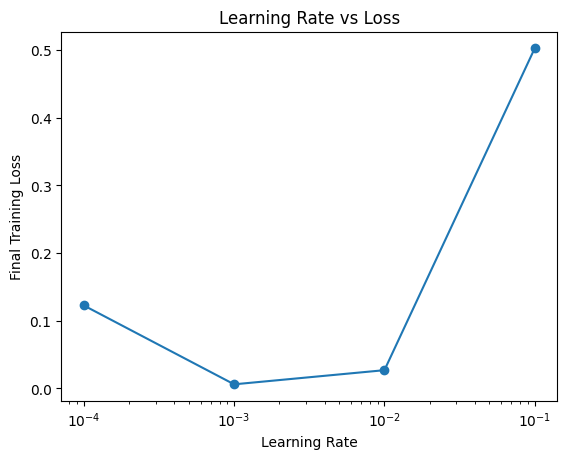

In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
train_loss = []

for lr in learning_rates:
    mlp = MLPClassifier(hidden_layer_sizes=(50,), activation='relu',
                        learning_rate_init=lr, max_iter=50, random_state=42)
    mlp.fit(X_train, y_train)
    train_loss.append(mlp.loss_)

plt.plot(learning_rates, train_loss, marker='o')
plt.xscale('log')
plt.xlabel("Learning Rate")
plt.ylabel("Final Training Loss")
plt.title("Learning Rate vs Loss")
plt.show()

In [ ]:
n_neurons_options = [50, 100, 150]
learning_rate_options = [0.001, 0.01, 0.1]
max_iter_options = [50, 100, 200]

In [ ]:
results = []

for n_neurons in n_neurons_options:
    for learning_rate in learning_rate_options:
        for max_iter in max_iter_options:
            mlp = MLPClassifier(hidden_layer_sizes=(n_neurons,), activation='relu',
                                learning_rate_init=learning_rate, max_iter=max_iter,
                                random_state=42)
            mlp.fit(X_train, y_train)
            test_accuracy = mlp.score(X_test, y_test)
            results.append({
                'n_neurons': n_neurons,
                'learning_rate': learning_rate,
                'max_iter': max_iter,
                'test_accuracy': test_accuracy
            })

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_neurons_options = [2, 5, 10, 20]
learning_rate_options = [0.001, 0.01, 0.1]
max_iter_options = [50, 100, 200]

results = []

for n_neurons in n_neurons_options:
    for lr in learning_rate_options:
        for max_iter in max_iter_options:
            mlp = MLPClassifier(hidden_layer_sizes=(n_neurons,),
                                learning_rate_init=lr,
                                max_iter=max_iter,
                                activation='relu',
                                solver='adam',
                                random_state=42)
            mlp.fit(X_train, y_train)
            test_accuracy = mlp.score(X_test, y_test)
            results.append({
                'n_neurons': n_neurons,
                'learning_rate': lr,
                'max_iter': max_iter,
                'test_accuracy': test_accuracy
            })

results_df = pd.DataFrame(results)


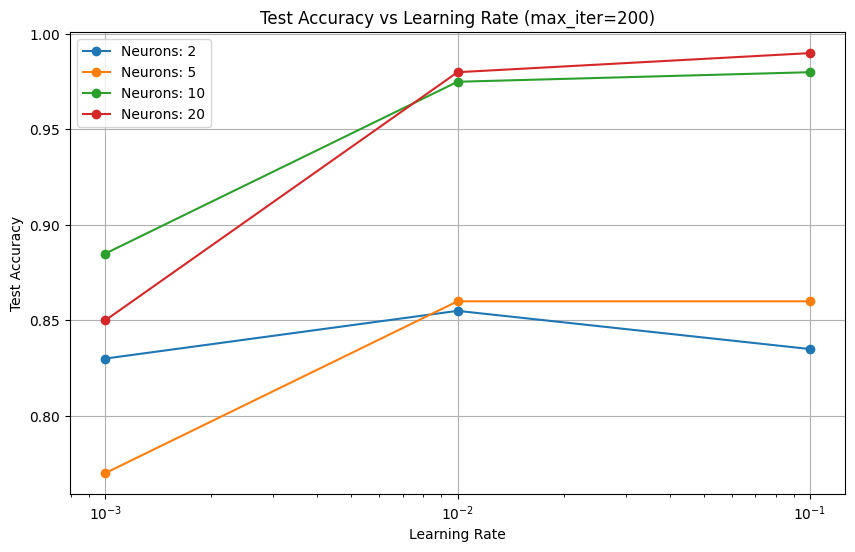

In [ ]:
fixed_max_iter = 200
plt.figure(figsize=(10, 6))

for n_neurons in results_df['n_neurons'].unique():
    subset_df = results_df[(results_df['max_iter'] == fixed_max_iter) &
                           (results_df['n_neurons'] == n_neurons)]
    plt.plot(subset_df['learning_rate'], subset_df['test_accuracy'], marker='o', label=f'Neurons: {n_neurons}')

plt.title(f'Test Accuracy vs Learning Rate (max_iter={fixed_max_iter})')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()

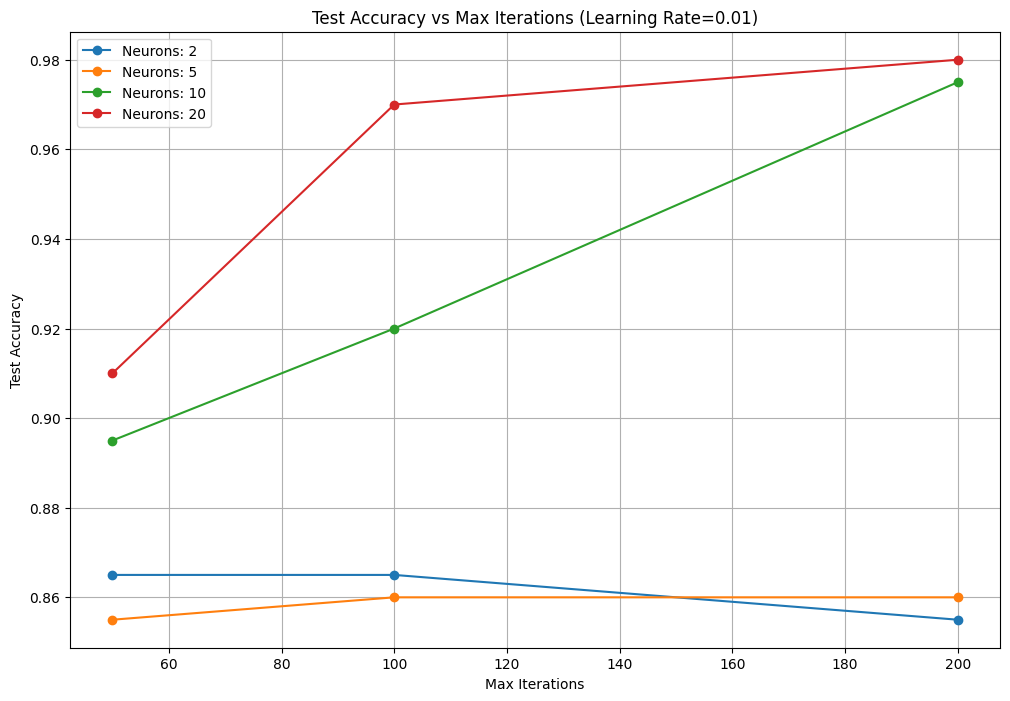

In [ ]:
fixed_lr = 0.01
plt.figure(figsize=(12, 8))

for n_neurons in n_neurons_options:
    subset_df = results_df[(results_df['n_neurons'] == n_neurons) &
                           (results_df['learning_rate'] == fixed_lr)]
    plt.plot(subset_df['max_iter'], subset_df['test_accuracy'], marker='o', label=f'Neurons: {n_neurons}')

plt.title(f'Test Accuracy vs Max Iterations (Learning Rate={fixed_lr})')
plt.xlabel('Max Iterations')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()
